<a href="https://colab.research.google.com/github/mortonsguide/axis-model-suite/blob/main/Chirality_AA_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

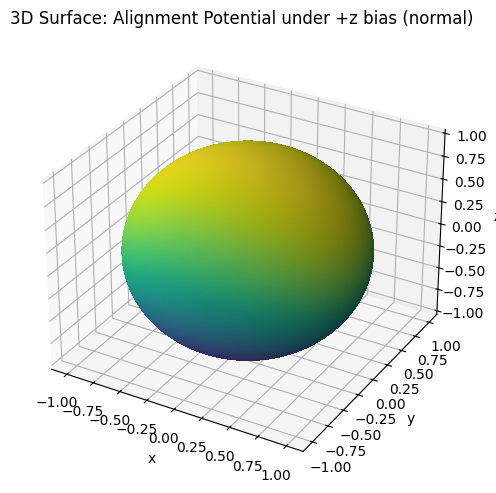

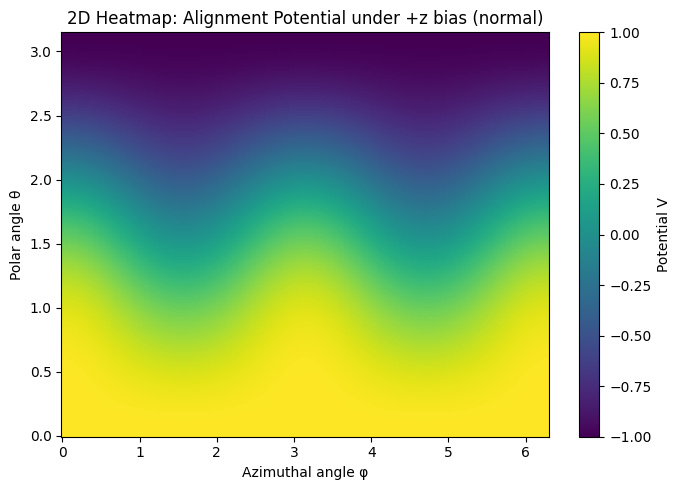

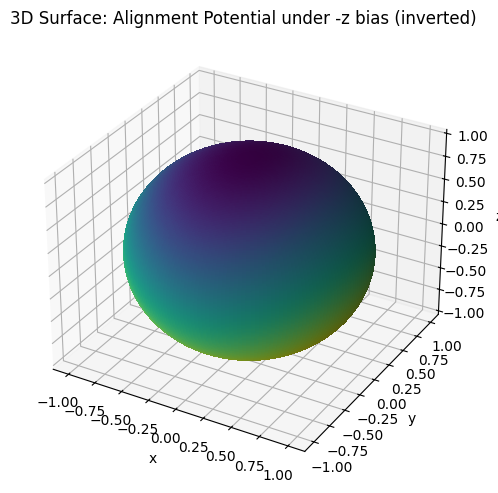

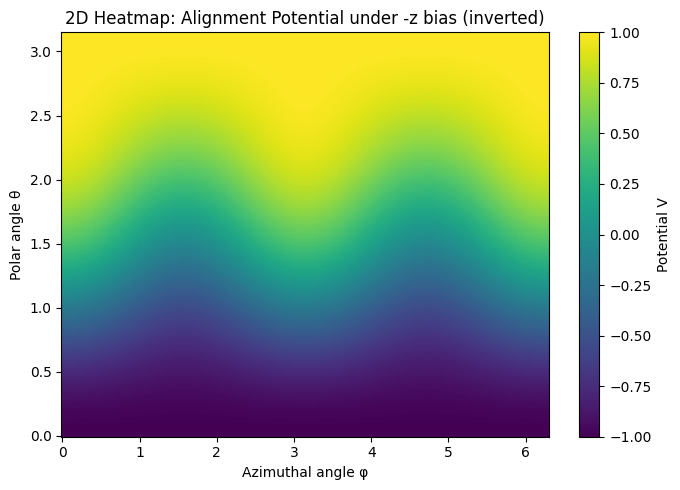

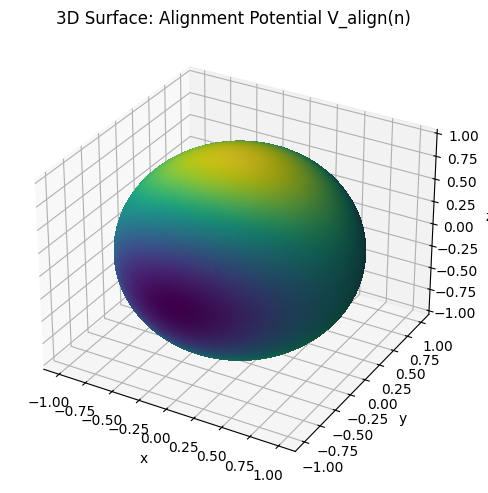

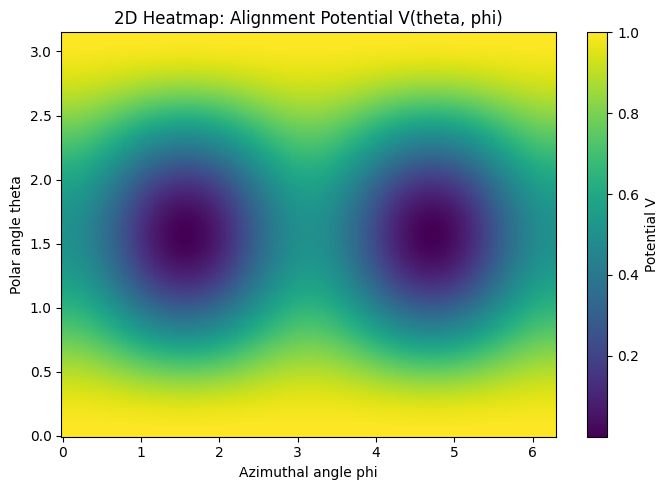

In [ ]:
# --- Chirality Alignment Potential ---
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Coupling strengths
alpha = 1.0  # gravitational bias
beta = 0.5   # scalar coherence bias

# Scalar alignment direction (fixed along x)
v_phi = np.array([1, 0, 0])

# Background z-biases to simulate (normal and inverted)
Z_backgrounds = {
    "+z bias (normal)": np.array([0, 0, 1]),
    "-z bias (inverted)": np.array([0, 0, -1])
}

# Define unit sphere grid
theta = np.linspace(0, np.pi, 200)
phi = np.linspace(0, 2*np.pi, 200)
theta, phi = np.meshgrid(theta, phi)

# Spherical to cartesian for plotting and computation
n_x = np.sin(theta) * np.cos(phi)
n_y = np.sin(theta) * np.sin(phi)
n_z = np.cos(theta)
n_vec = np.stack([n_x, n_y, n_z], axis=-1)

# Function to compute the potential
def compute_potential(Z_bg):
    dot_Z = np.dot(n_vec, Z_bg)
    dot_phi = np.dot(n_vec, v_phi)
    V = alpha * dot_Z + beta * (dot_phi ** 2)
    return V

# Plot 3D sphere view
def plot_3d(V, title):
    fig = plt.figure(figsize=(6, 5))
    ax = fig.add_subplot(111, projection='3d')
    norm = (V - V.min()) / (V.max() - V.min())
    ax.plot_surface(n_x, n_y, n_z, facecolors=plt.cm.viridis(norm), rstride=1, cstride=1,
                    antialiased=False, linewidth=0)
    ax.set_title(title)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    plt.tight_layout()
    plt.show()

# Plot 2D heatmap view
def plot_2d(V, title):
    fig, ax = plt.subplots(figsize=(7, 5))
    pcm = ax.pcolormesh(phi, theta, V, shading='auto', cmap='viridis')
    fig.colorbar(pcm, ax=ax, label='Potential V')
    ax.set_title(title)
    ax.set_xlabel("Azimuthal angle φ")
    ax.set_ylabel("Polar angle θ")
    plt.tight_layout()
    plt.show()

# Run comparisons for both gravitational bias scenarios
for label, Z_bg in Z_backgrounds.items():
    V = compute_potential(Z_bg)
    plot_3d(V, f"3D Surface: Alignment Potential under {label}")
    plot_2d(V, f"2D Heatmap: Alignment Potential under {label}")

# Simulate Chirality Inversion from Rotating Black Hole Frame Dragging

# Define position-dependent gravitational bias: alpha(θ) flips across equator
alpha_theta = np.cos(theta)  # +1 at north pole, 0 at equator, -1 at south pole

# Compute new alignment potential with spatially varying alpha
def compute_potential_alpha_theta(Z_bg):
    dot_Z = np.dot(n_vec, Z_bg)
    dot_phi = np.dot(n_vec, v_phi)
    V = alpha_theta * dot_Z + beta * (dot_phi ** 2)
    return V

# Use same gravitational bias direction (+z) but with α(θ) flipping sign
Z_bg_flipping = np.array([0, 0, 1])  # unchanging background vector
V_chirality_flip = compute_potential_alpha_theta(Z_bg_flipping)

# Visualize the effect: chirality inversion across θ = π/2 (equator)
plot_3d_fixed(V_chirality_flip)
plot_2d_fixed(V_chirality_flip)

